## <center>Random Forest - Regression</center>

Plus: An Additional Analysis of Various Regression Methods!


### The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is, but

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/Python/Machine Learning/Supervised Learning/Tree Methods/Data Sets/rock_density_xray.csv")
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns=['Signal',"Density"]

<AxesSubplot:xlabel='Signal', ylabel='Density'>

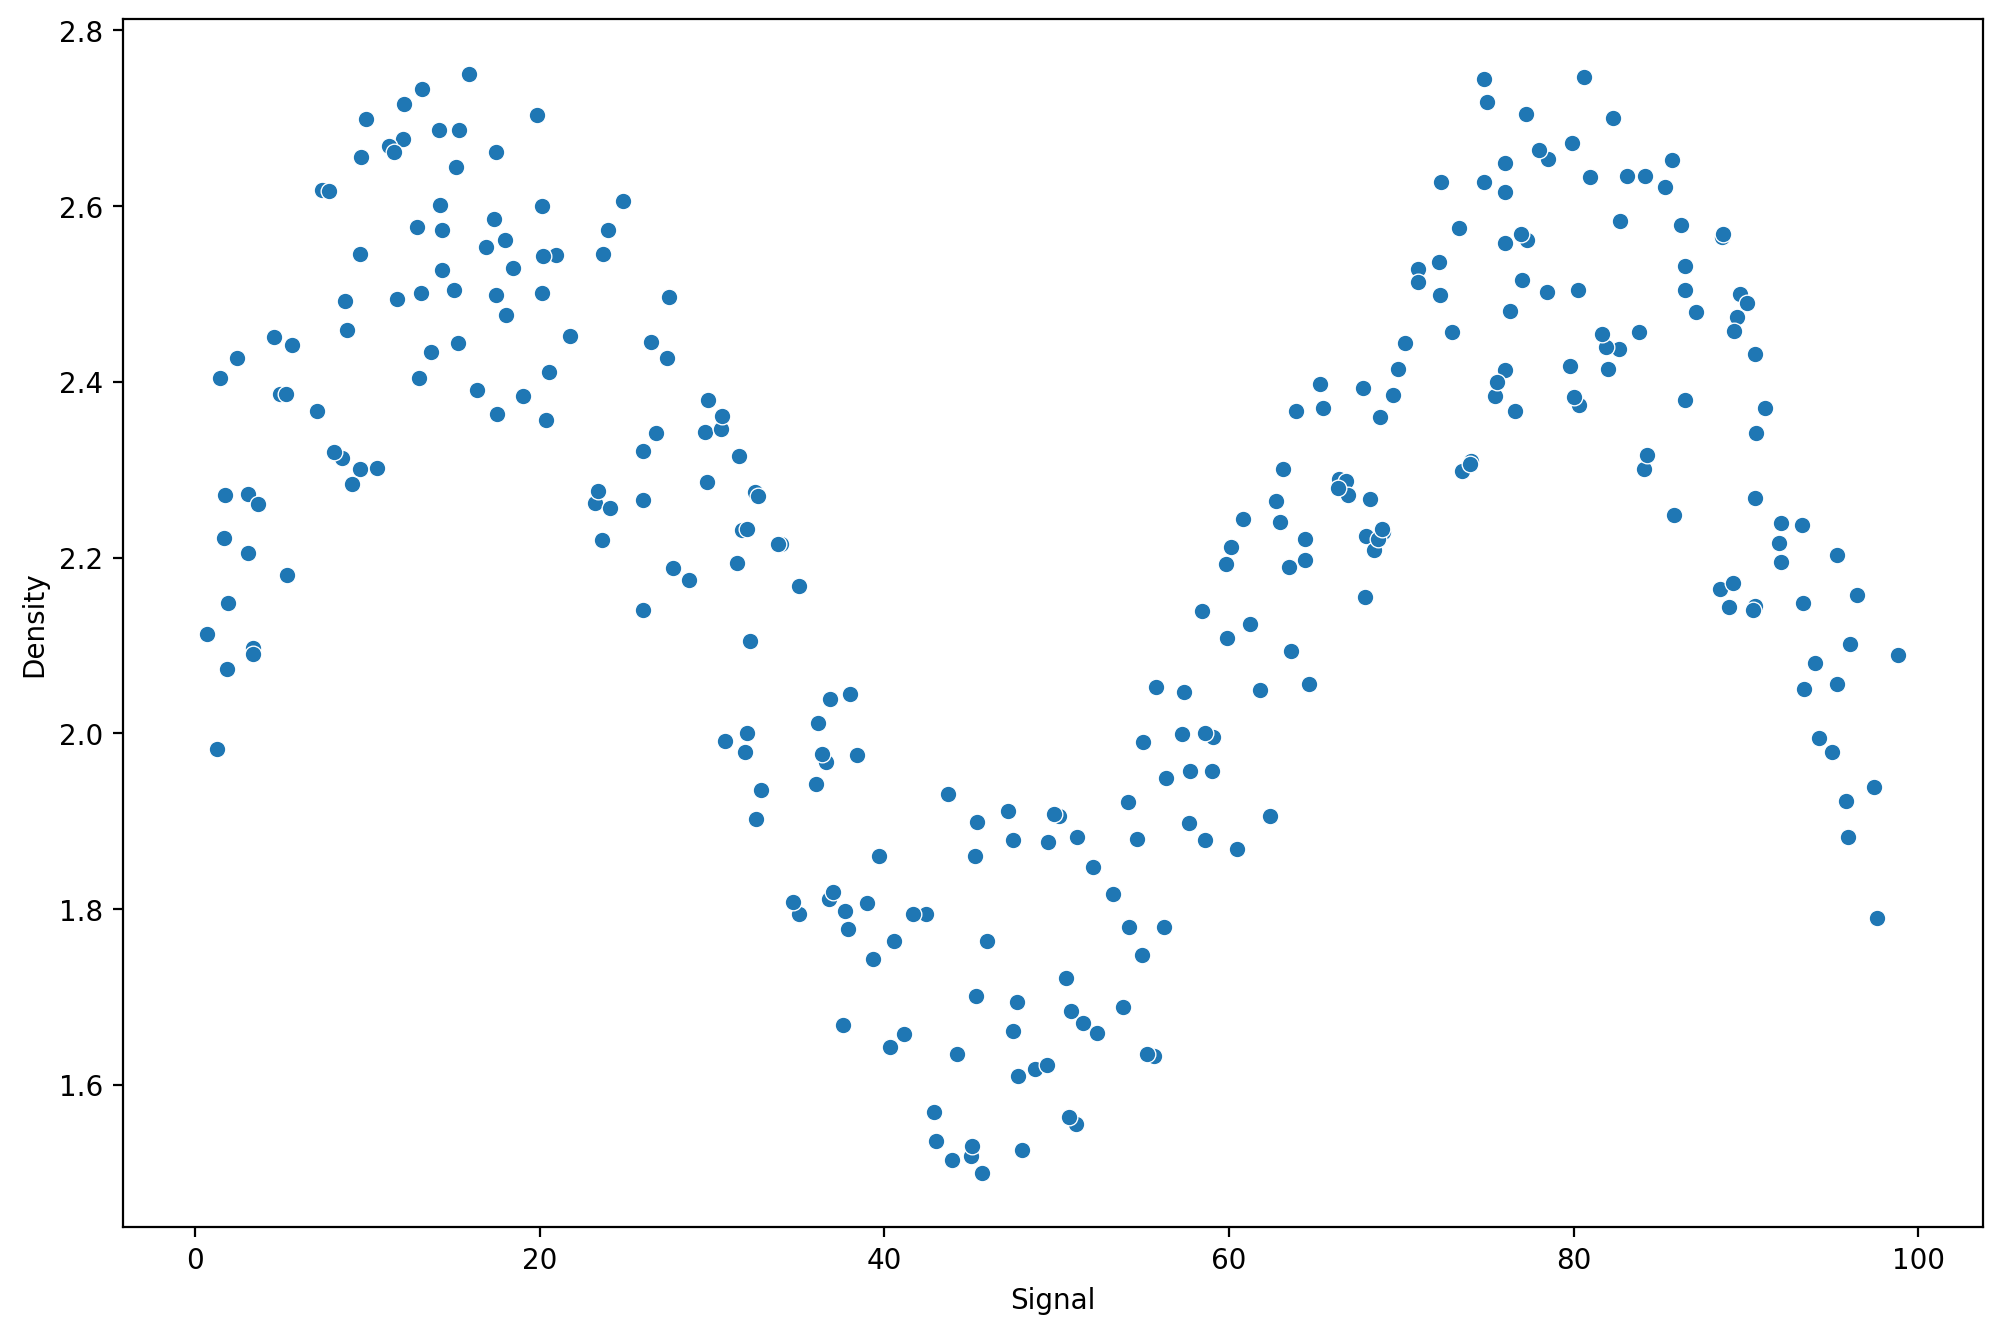

In [4]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

#### Splitting the Data

Let's split the data in order to be able to have a Test set for performance metric evaluation.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Signal']]
y = df['Density']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

### Regression models

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f"MAE: {mae}")
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output);

#### 1. Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression

MAE: 0.211198973318633
RMSE : 0.2570051996584629


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


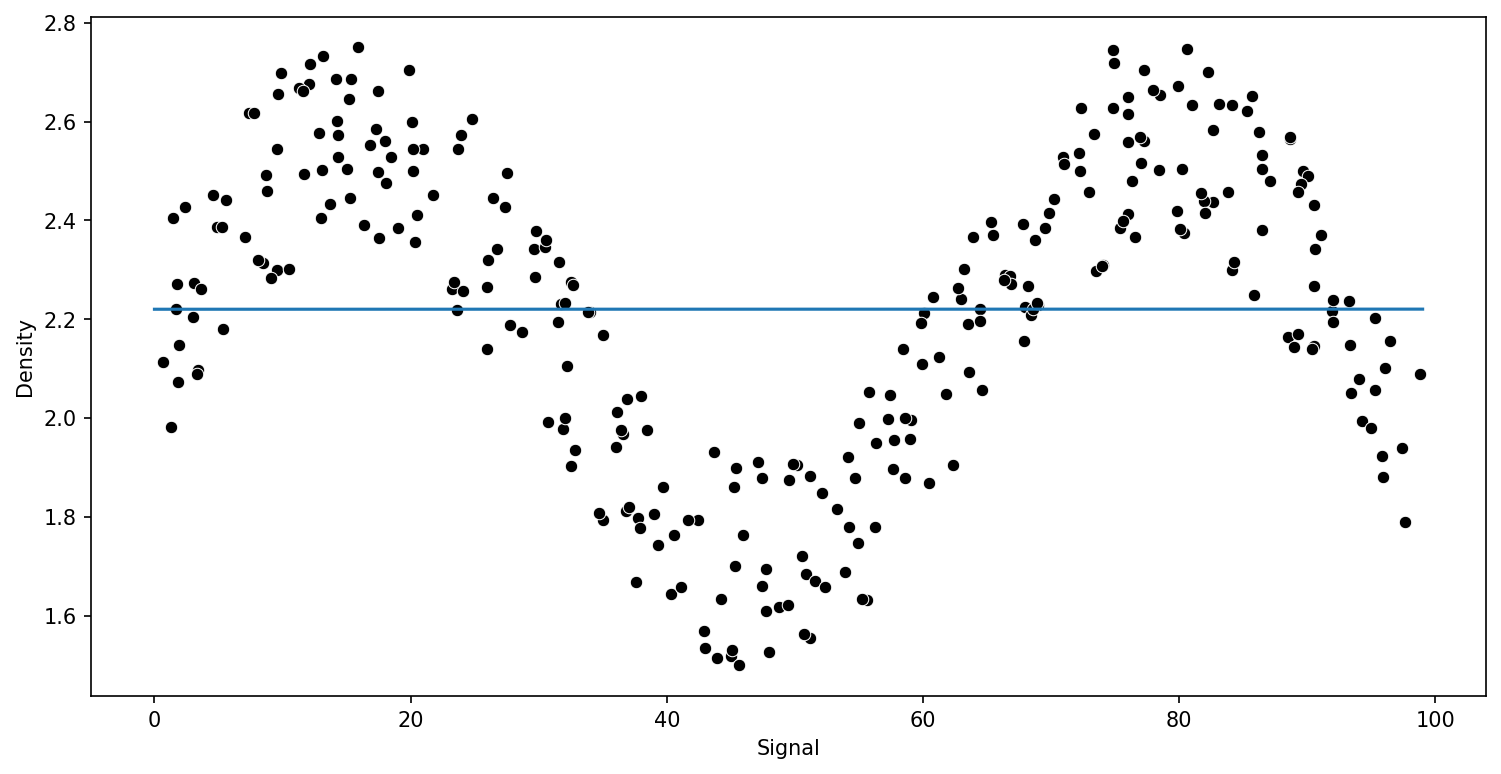

In [10]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

#### 2. Polynomial Regression

##### Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

##### Pipeline for Poly Orders

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

MAE: 0.2290310544351128
RMSE : 0.2817309563725583


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


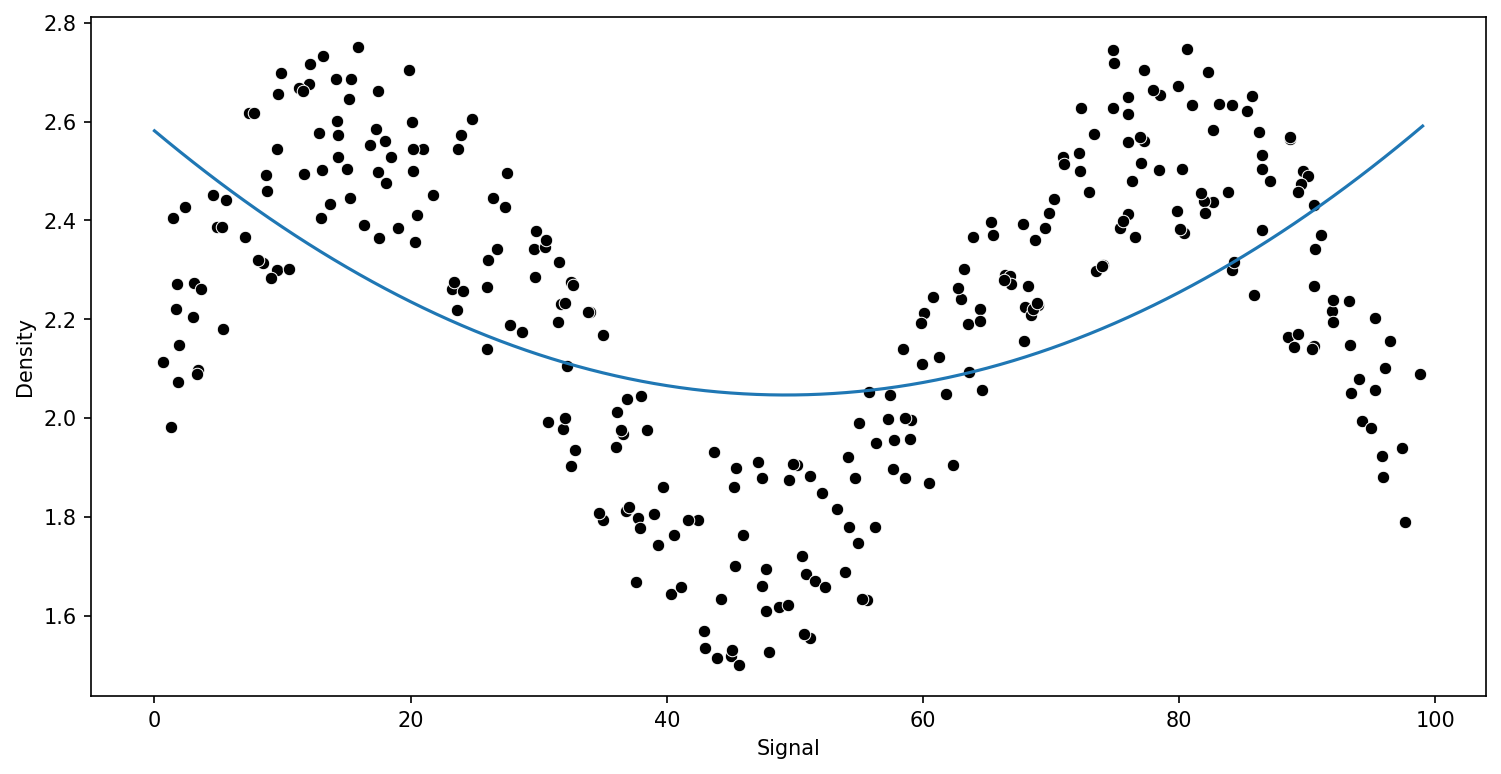

In [12]:
pipe = make_pipeline(PolynomialFeatures(2),LinearRegression())
run_model(pipe,X_train,y_train,X_test,y_test)

##### Comparing Various Polynomial Orders

MAE: 0.211198973318633
RMSE : 0.2570051996584629
MAE: 0.2290310544351128
RMSE : 0.2817309563725583
MAE: 0.24211834039538987
RMSE : 0.2879748127921239


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


MAE: 0.1184764278857817
RMSE : 0.145886333977699
MAE: 0.11864312788959727
RMSE : 0.14452813873673478
MAE: 0.11969104973085308
RMSE : 0.13807414122297
MAE: 0.11880633717902661
RMSE : 0.13614729558738545


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


MAE: 0.11921655753607893
RMSE : 0.13541707758756275
MAE: 0.12415759278036788
RMSE : 0.1377836914441893
MAE: 0.1246691689925818
RMSE : 0.14034715212444523


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


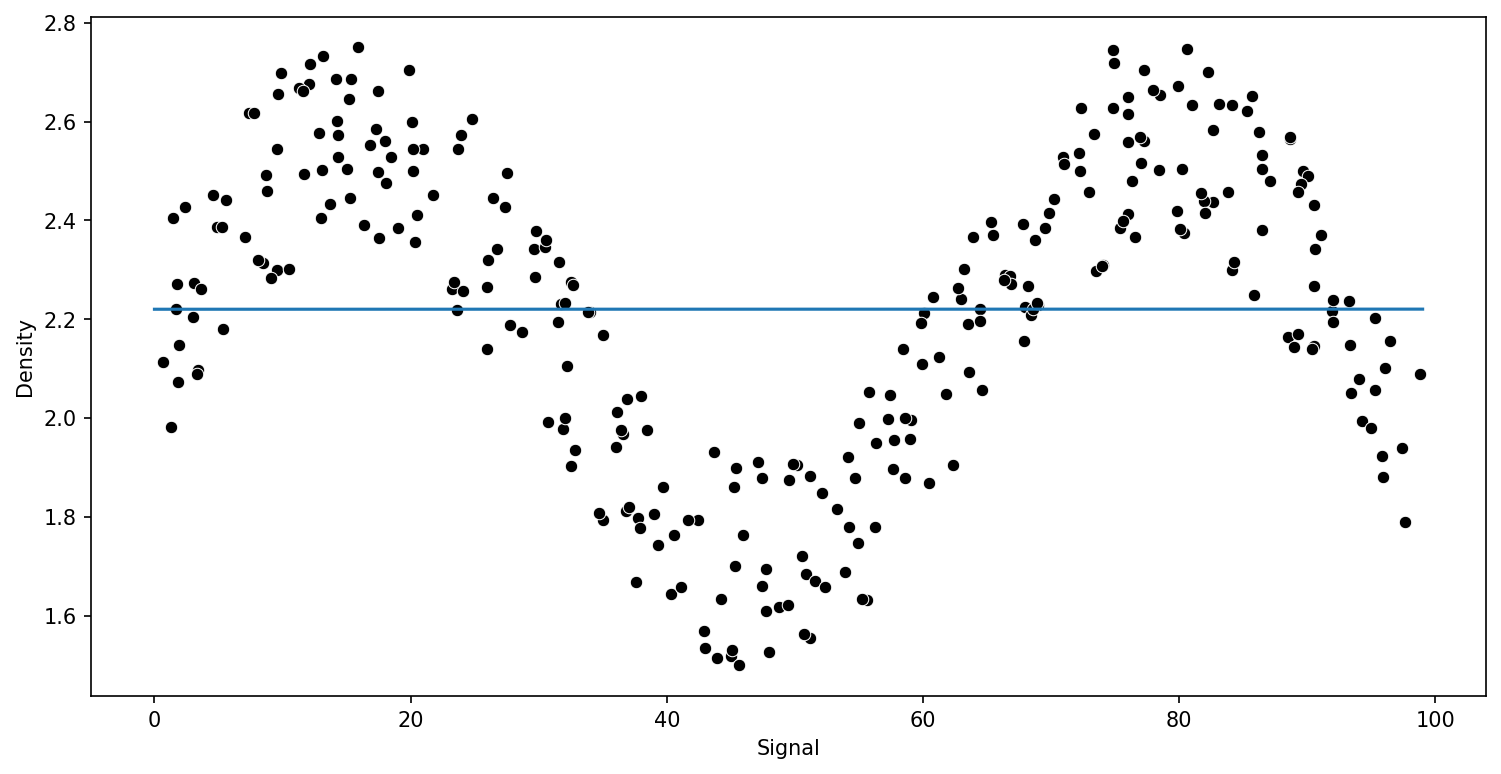

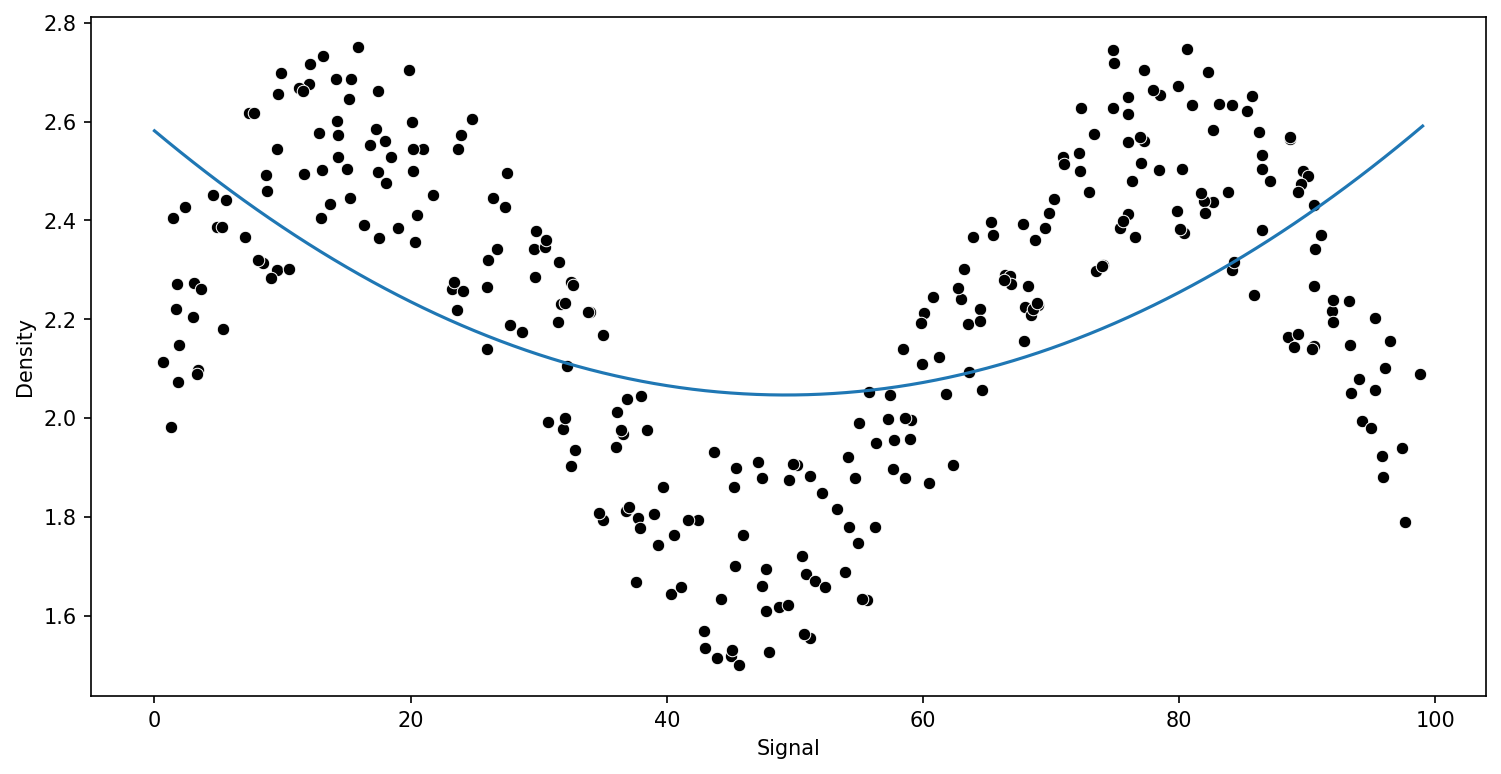

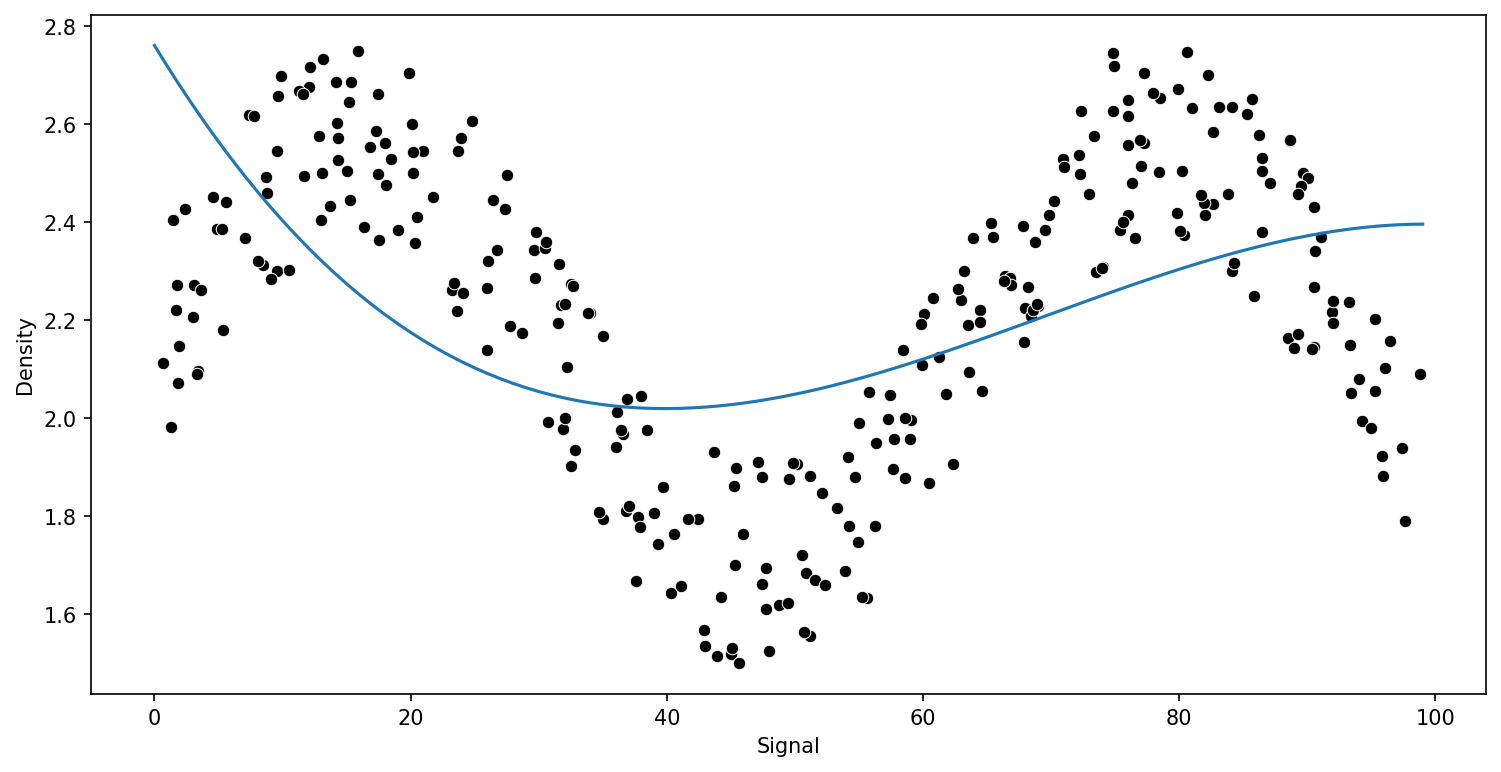

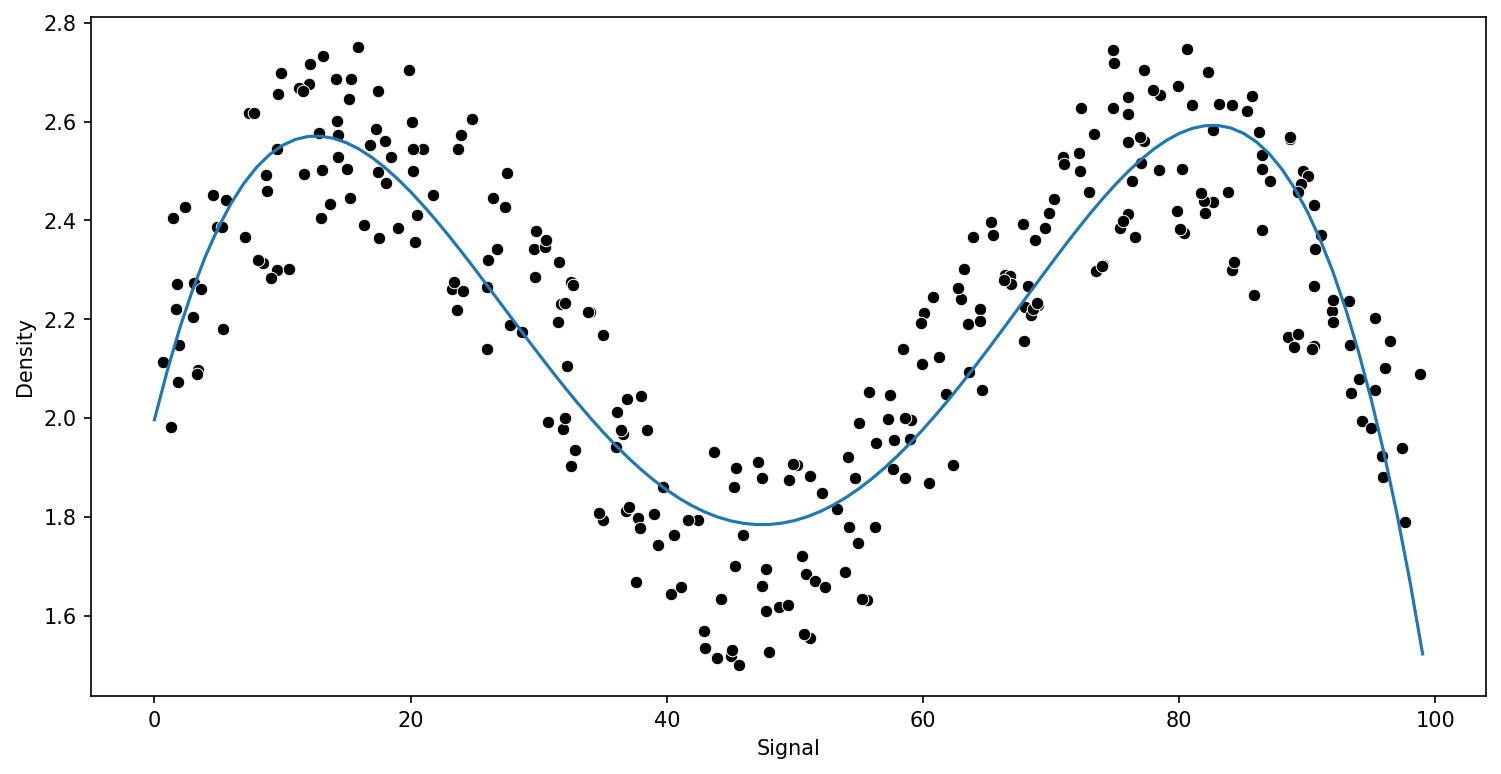

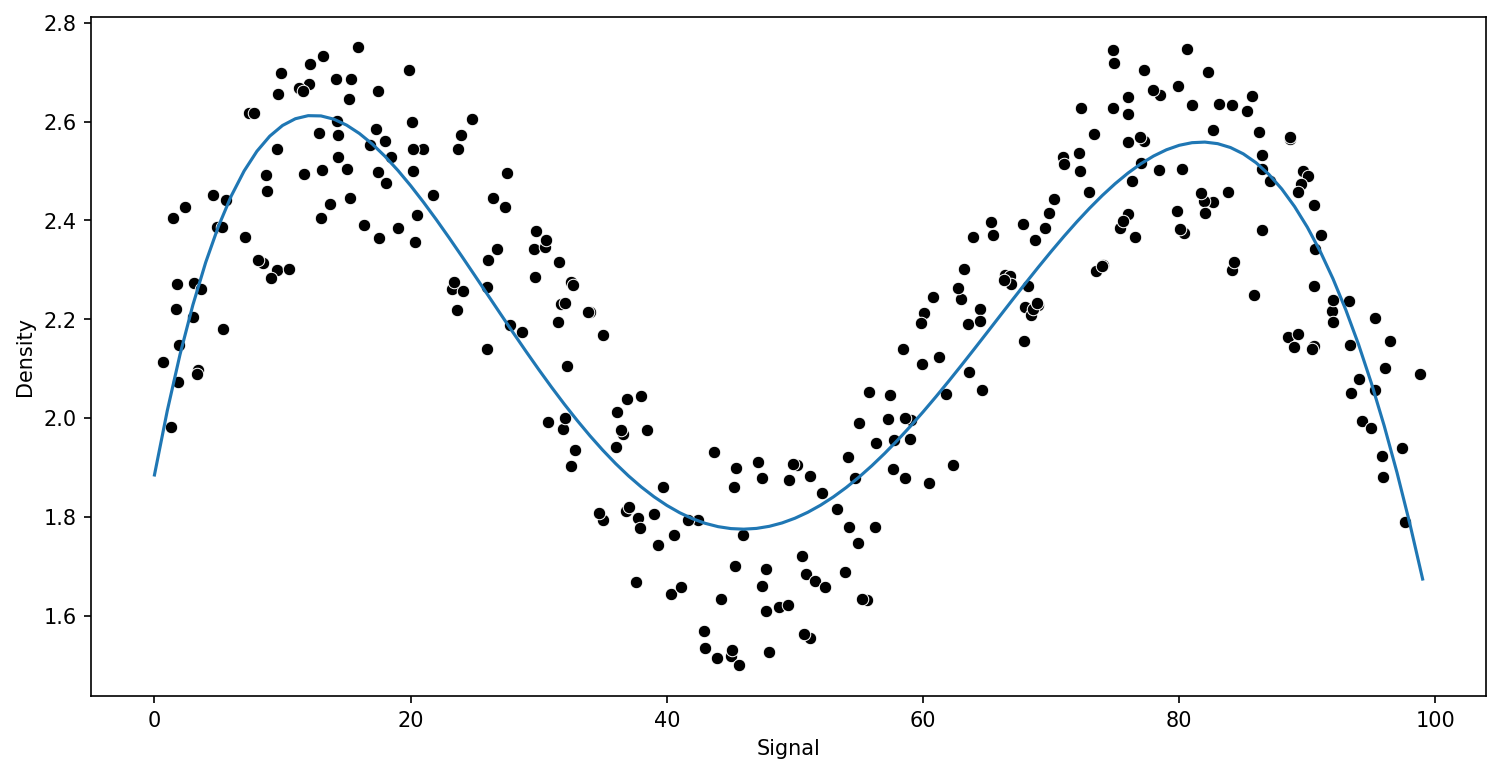

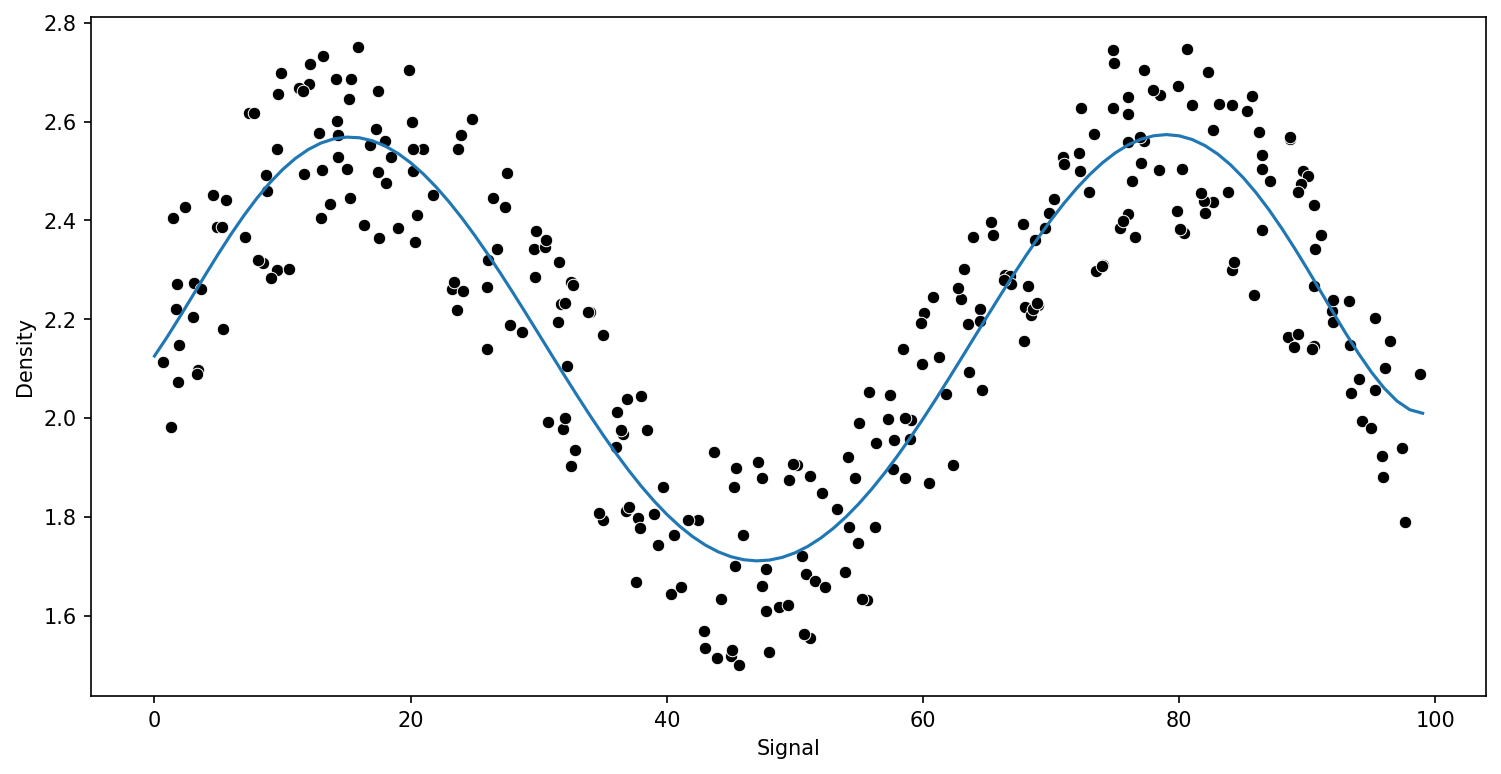

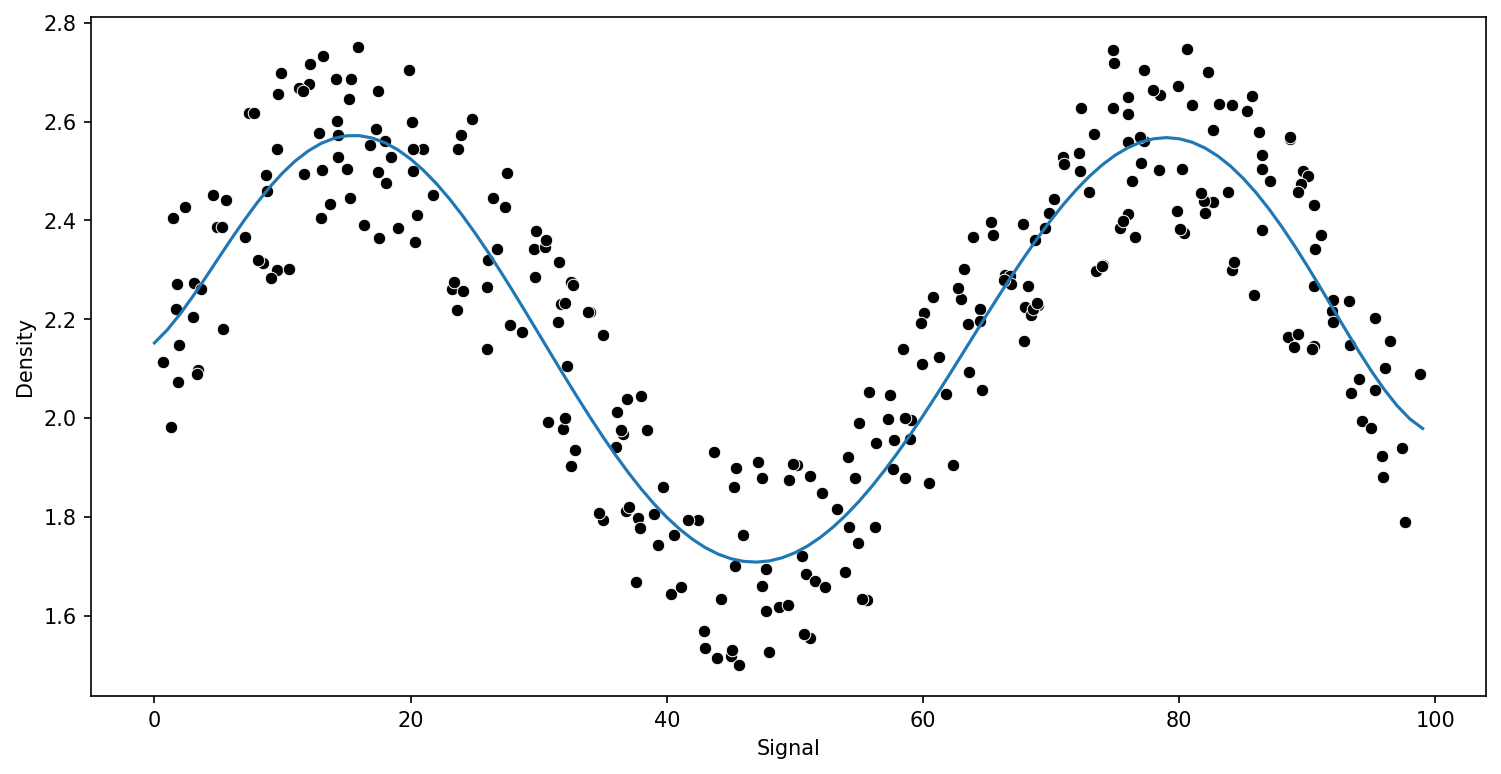

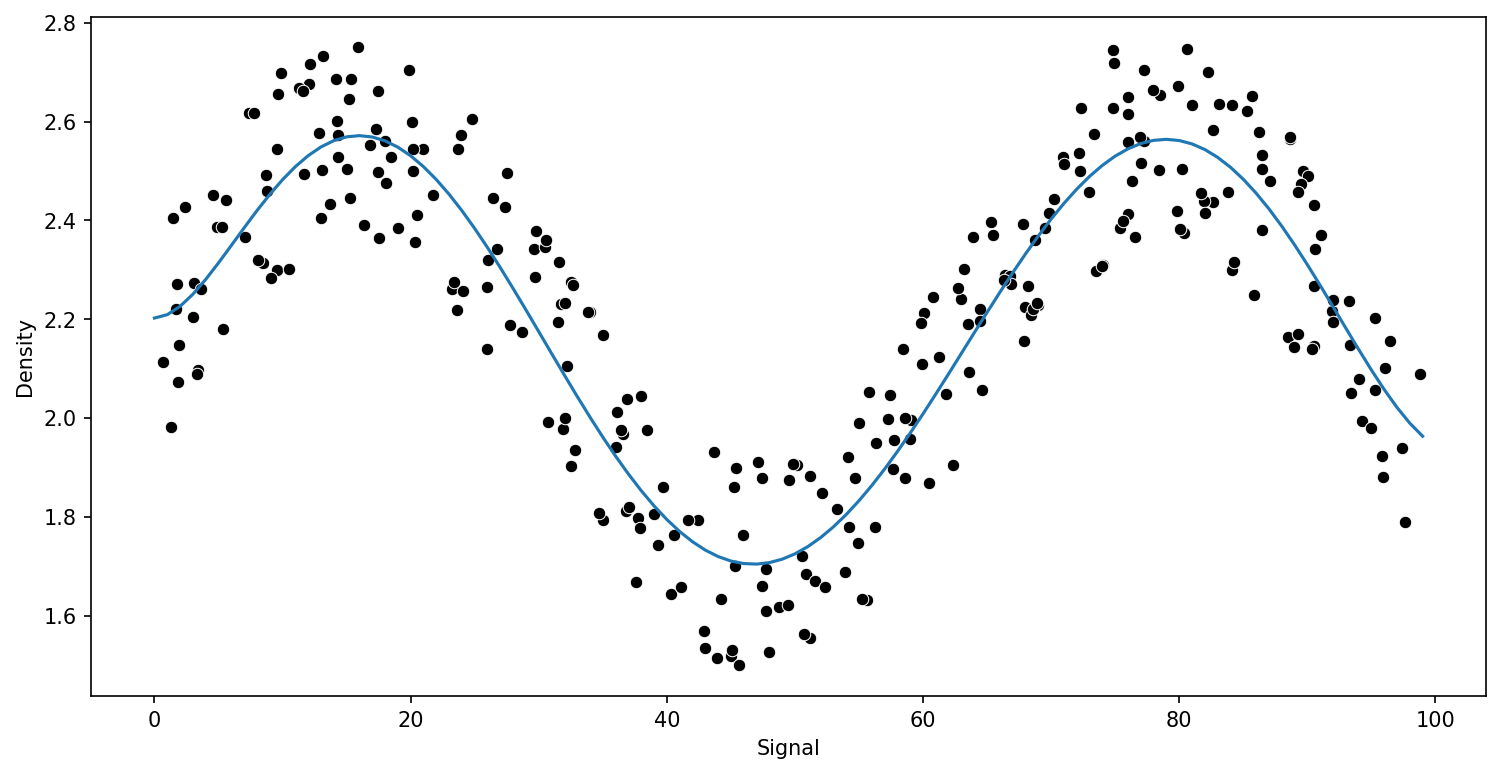

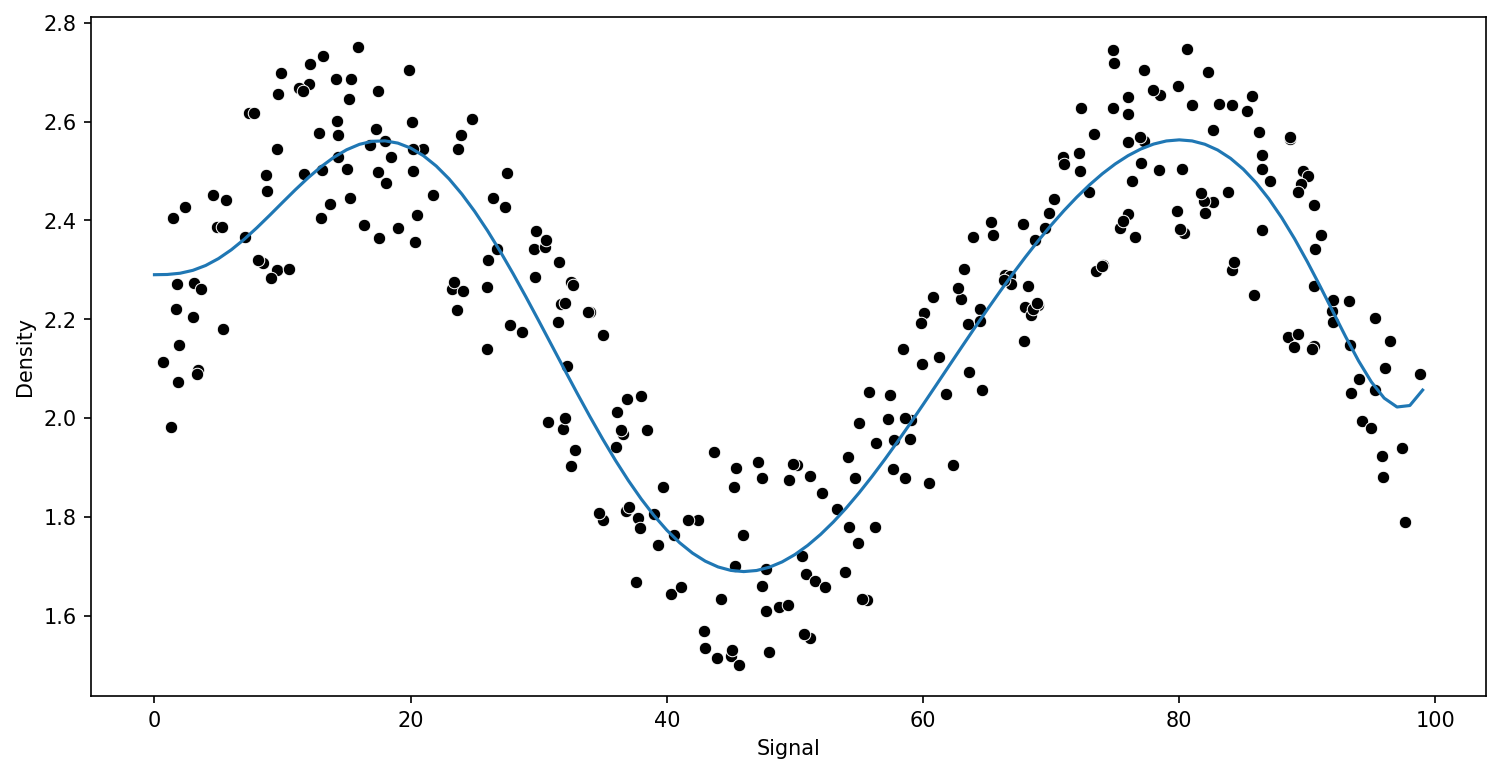

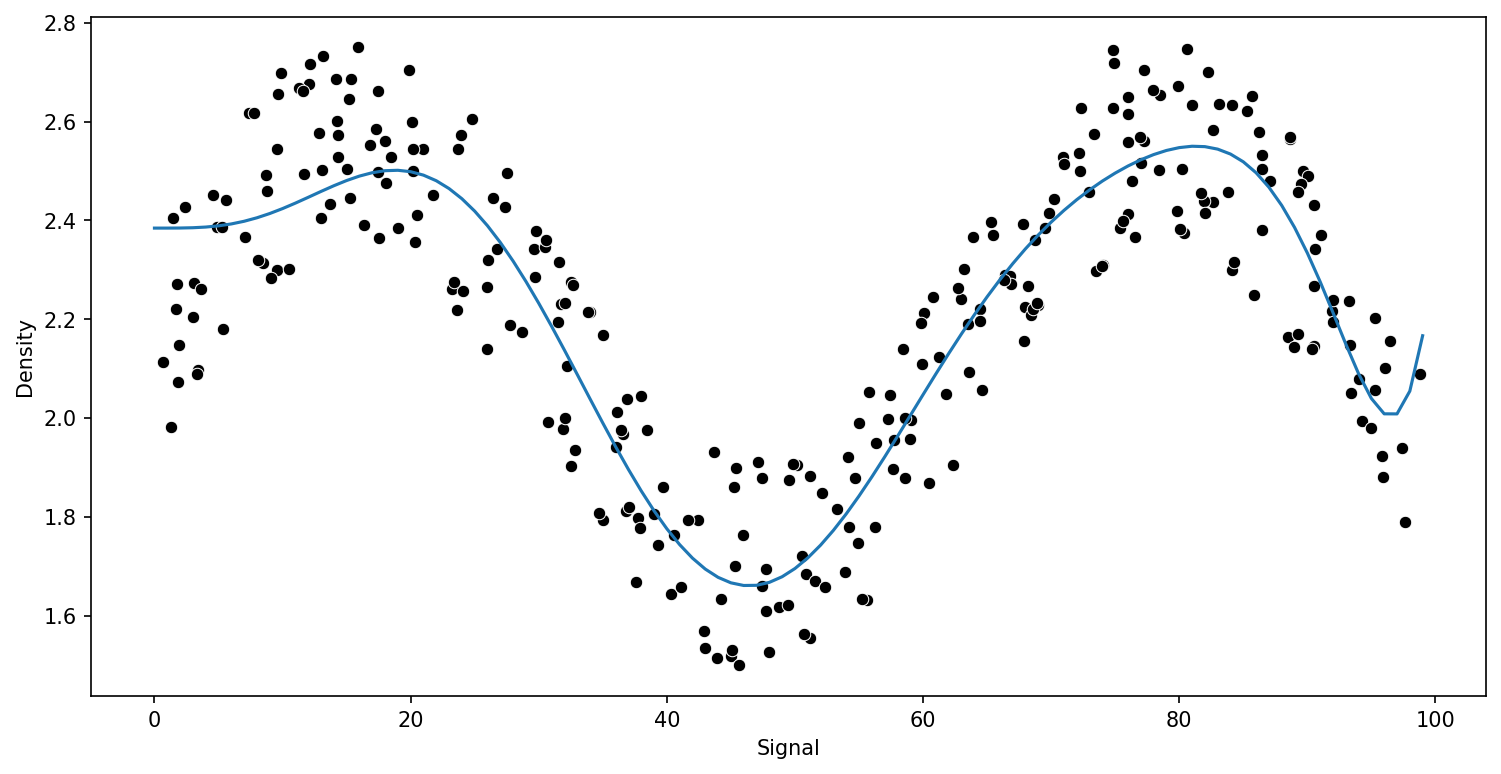

In [13]:
for i in range(1, 11):
    pipe = make_pipeline(PolynomialFeatures(i),LinearRegression())
    run_model(pipe,X_train,y_train,X_test,y_test)

### More robust regressors

#### 3. KNN Regression

In [14]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE : 0.1523487028635337
MAE: 0.12198383614100558
RMSE : 0.13730685016923647


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


MAE: 0.11635971693292672
RMSE : 0.13277855732740926


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


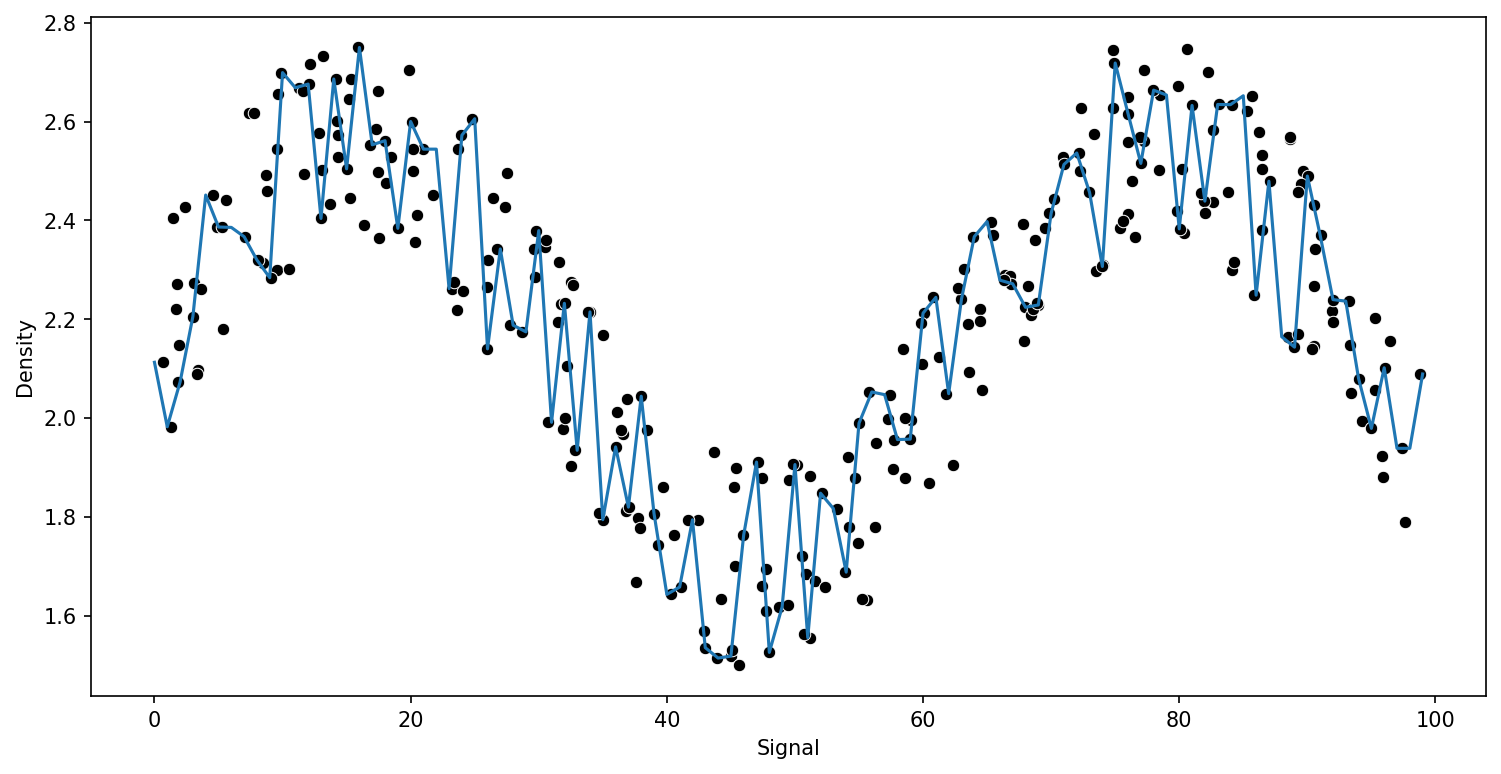

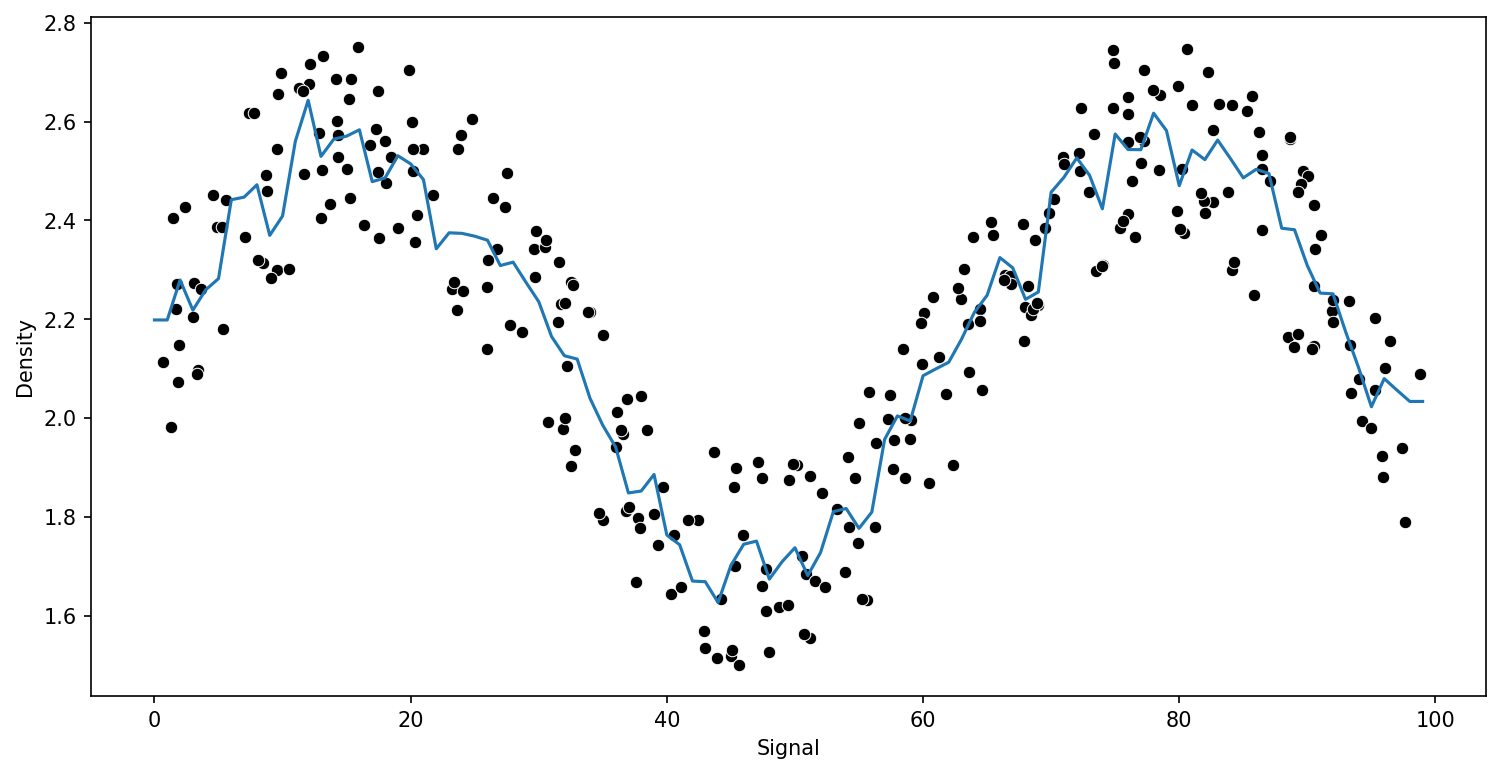

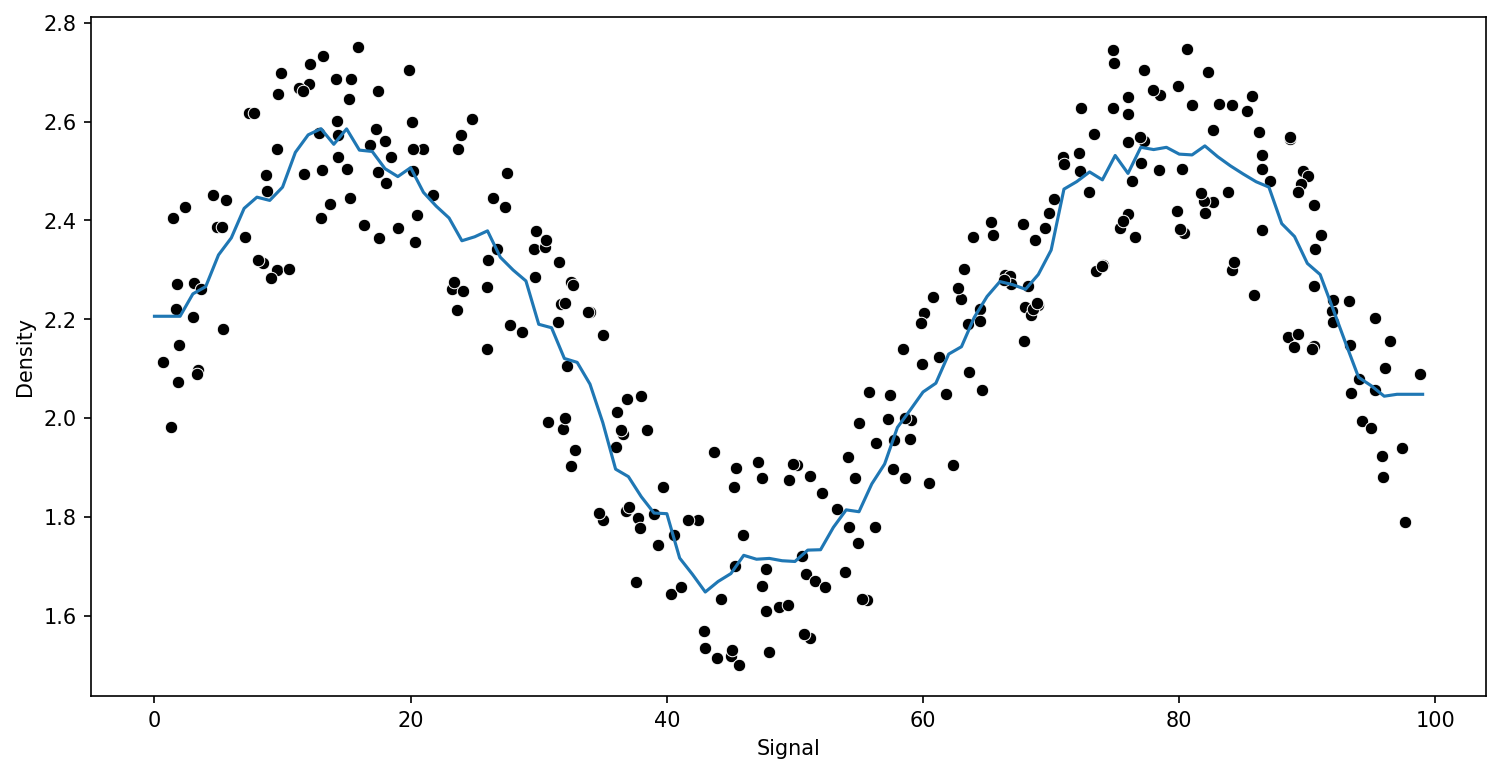

In [15]:
preds = {}
k_values = [1,5,10]
for n in k_values:
    
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

#### 4. Decission Tree Regression

In [16]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE : 0.1523487028635337


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


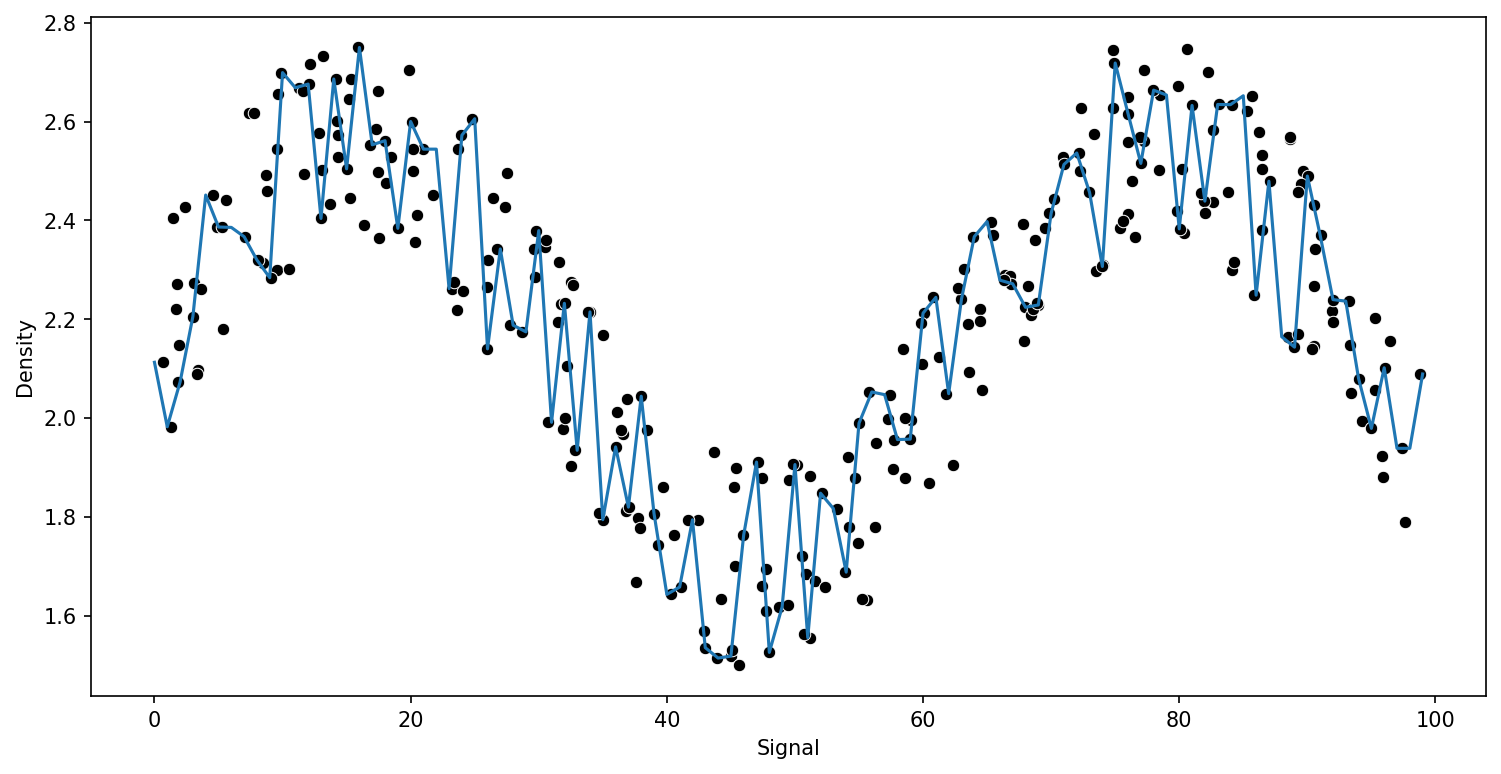

In [17]:
model = DecisionTreeRegressor()

run_model(model,X_train,y_train,X_test,y_test)

In [18]:
model.get_n_leaves()

270

#### 5. Support Vector Regression

In [19]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'C':[0.01,0.1,1,5,10,100,1000],'gamma':['auto','scale']}
svr = SVR()

In [21]:
grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121348368
RMSE : 0.12646999302046696


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


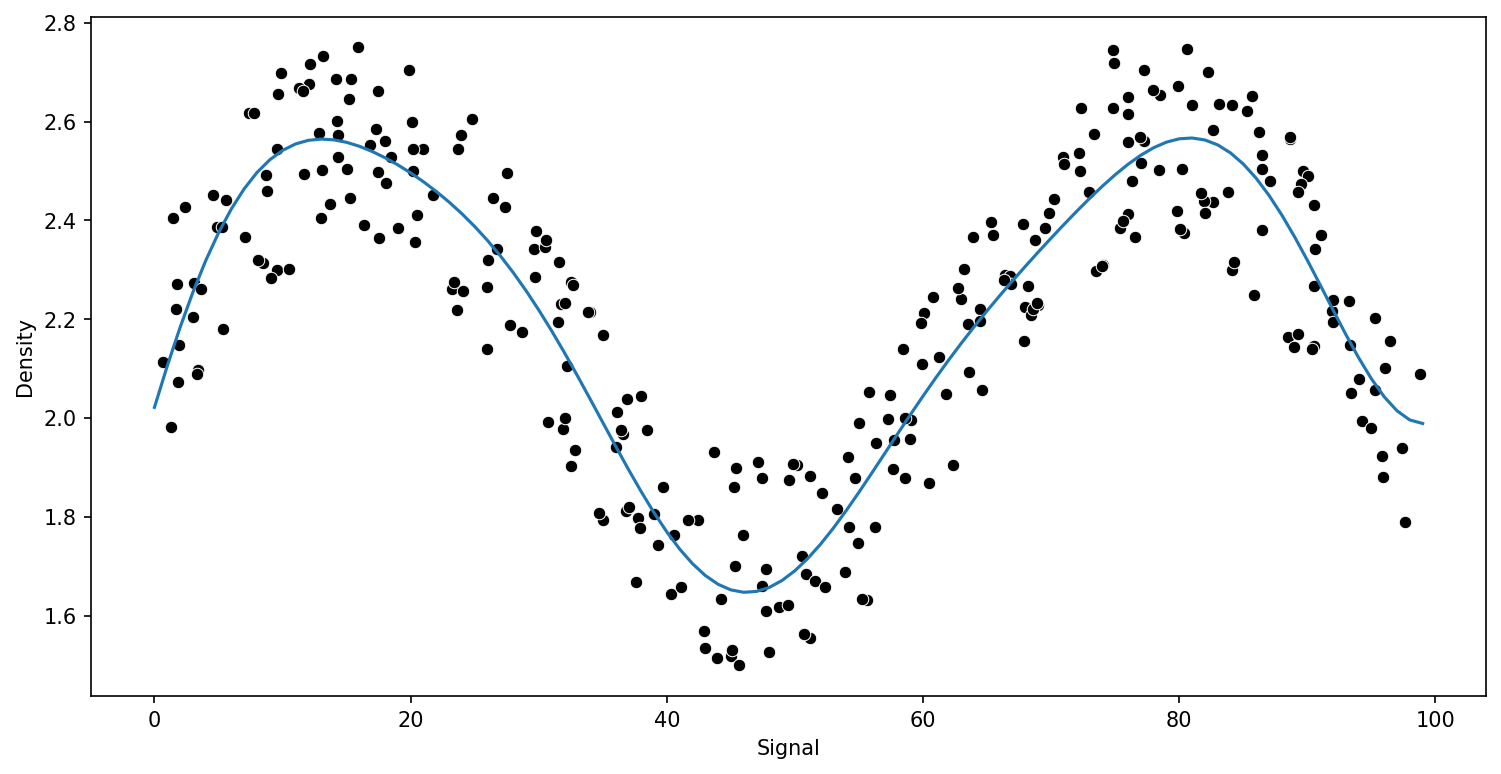

In [22]:
run_model(grid,X_train,y_train,X_test,y_test)

In [23]:
grid.best_estimator_

SVR(C=1000)

#### 6. Random Forest Regression

In [24]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.10120063725318428
RMSE : 0.12680288730852923


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


MAE: 0.11291090045117219
RMSE : 0.1358629774754419


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


MAE: 0.11165713107494347
RMSE : 0.1331330947376795


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


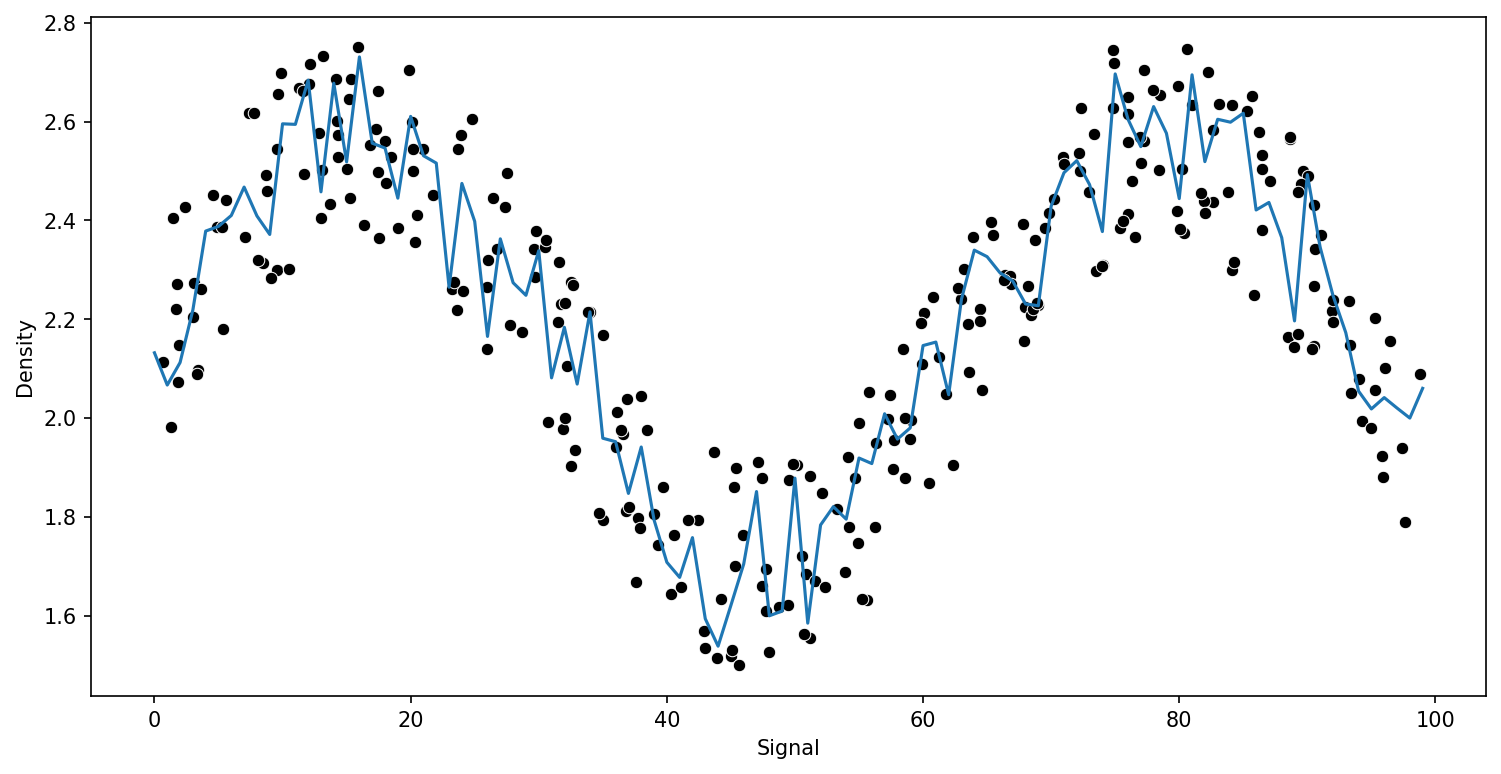

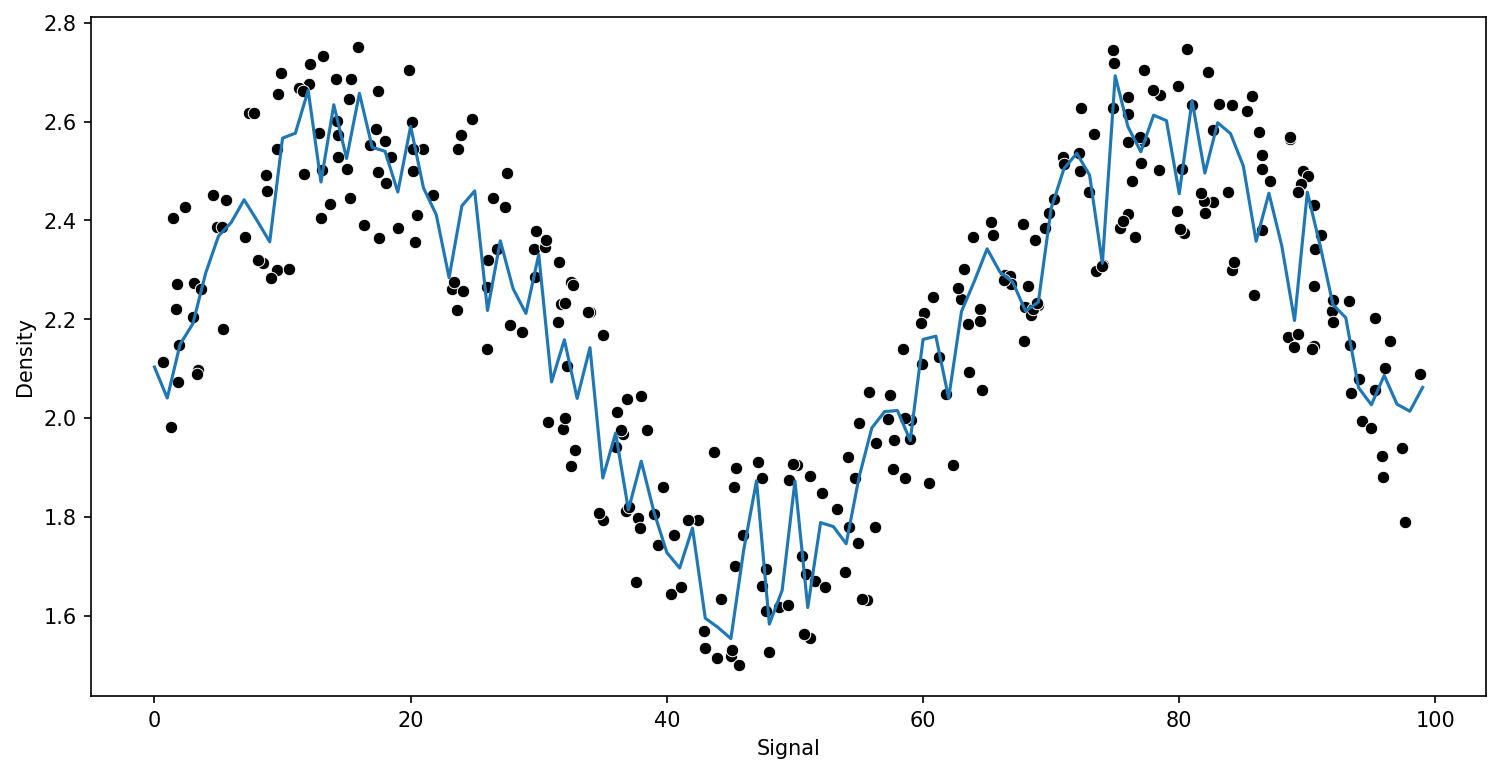

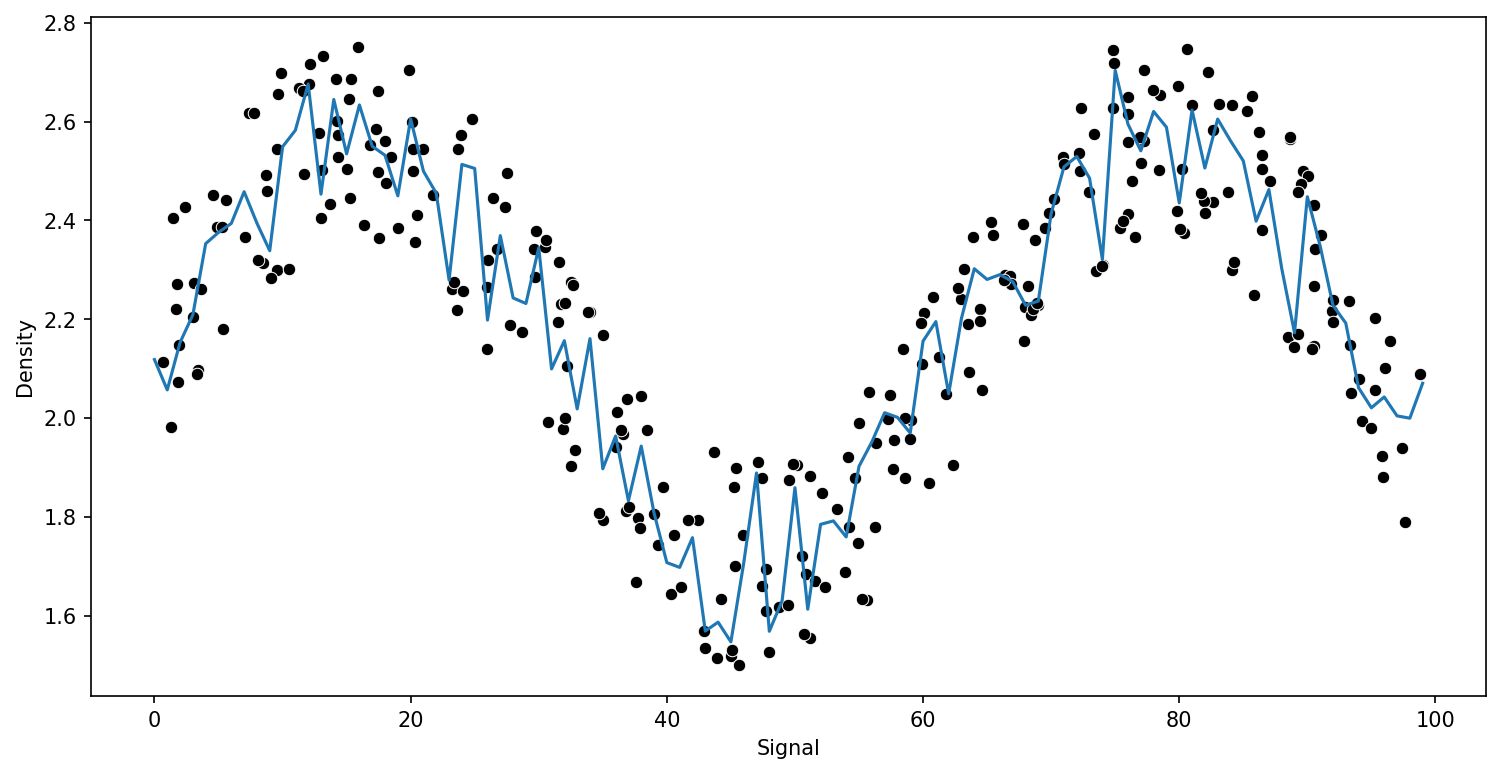

In [25]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)

#### 7. Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingRegressor

MAE: 0.11318284854800689
RMSE : 0.13294148649584667


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


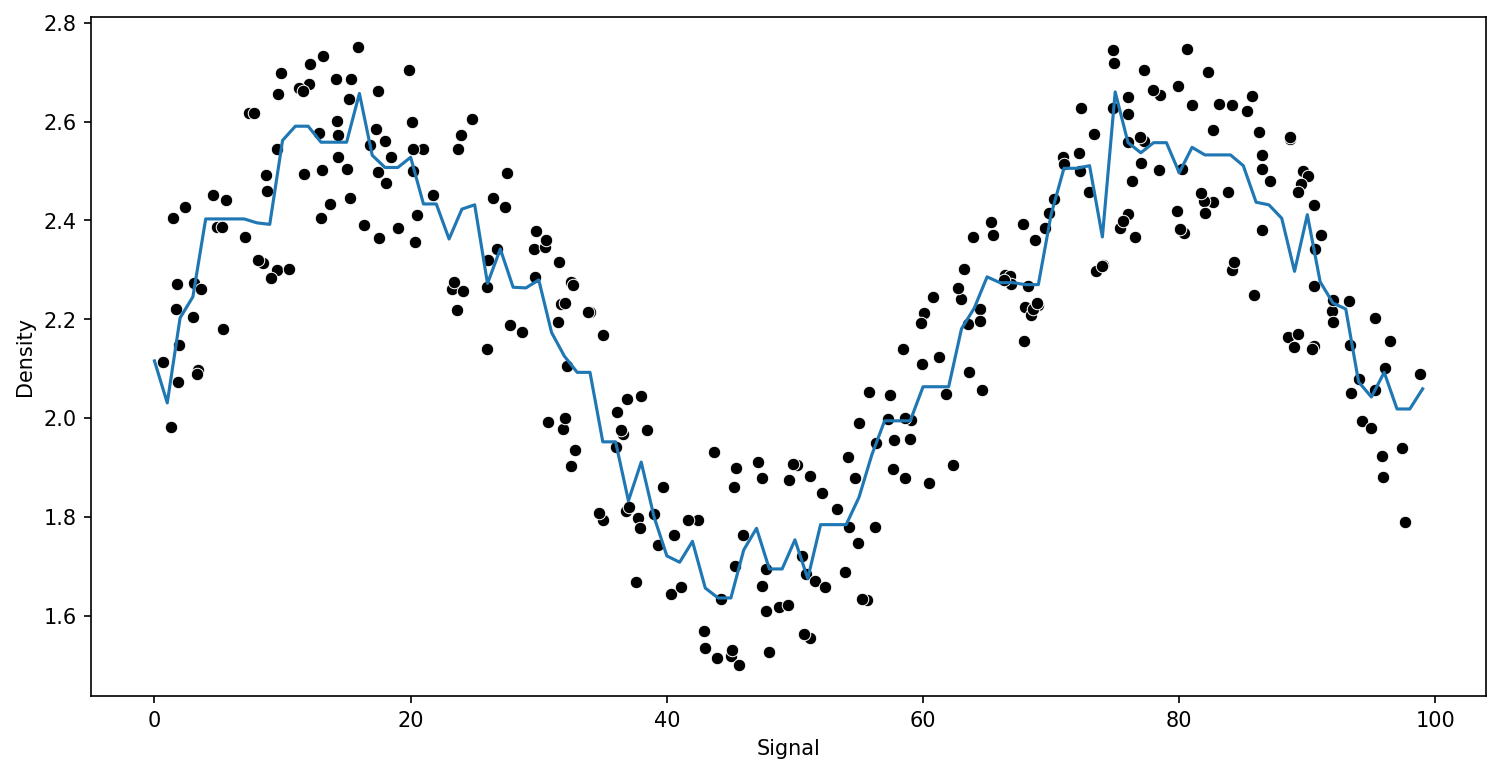

In [27]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)

#### 8. Adaboost

In [28]:
from sklearn.ensemble import AdaBoostRegressor

MAE: 0.11318284854800689
RMSE : 0.13294148649584667


c:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


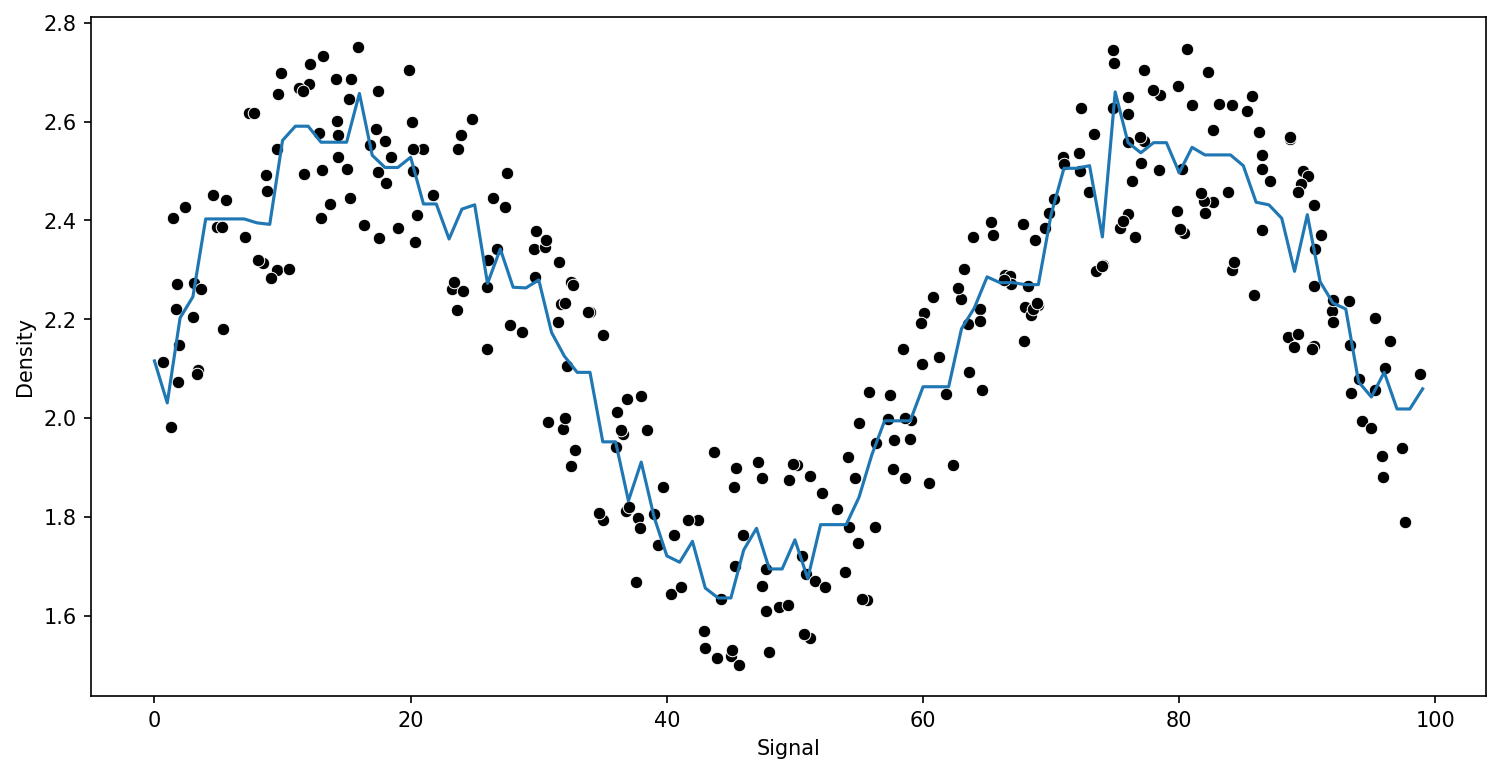

In [29]:
model = GradientBoostingRegressor()

run_model(model,X_train,y_train,X_test,y_test)